# Lab 4 : PCA

## G3 SDI - Machine Learning

In this lab, we are going to study the most fundamental dimensionality reduction method : PCA. More precisely, we are going to apply it to the *Olivetti* dataset, which contains images of faces.

### Instructions
* Rename your notebook with your surnames as `lab4_Name1_Name2.ipynb`, and include your names in the notebook.
* Your code, and its output, must be commented !
* Please upload your notebook on Moodle in the dedicated section before the deadline.

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
Report written by [name1], [name2], date.
</div>

In [1]:
# Import usual libraries
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Import the dataset
from sklearn.datasets import fetch_olivetti_faces

data = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/farahamorri/scikit_learn_data


**Q1.** What is this dataset about ? How many examples do we have ? How many features ?

Display the first 50 images from the dataset. Comment.

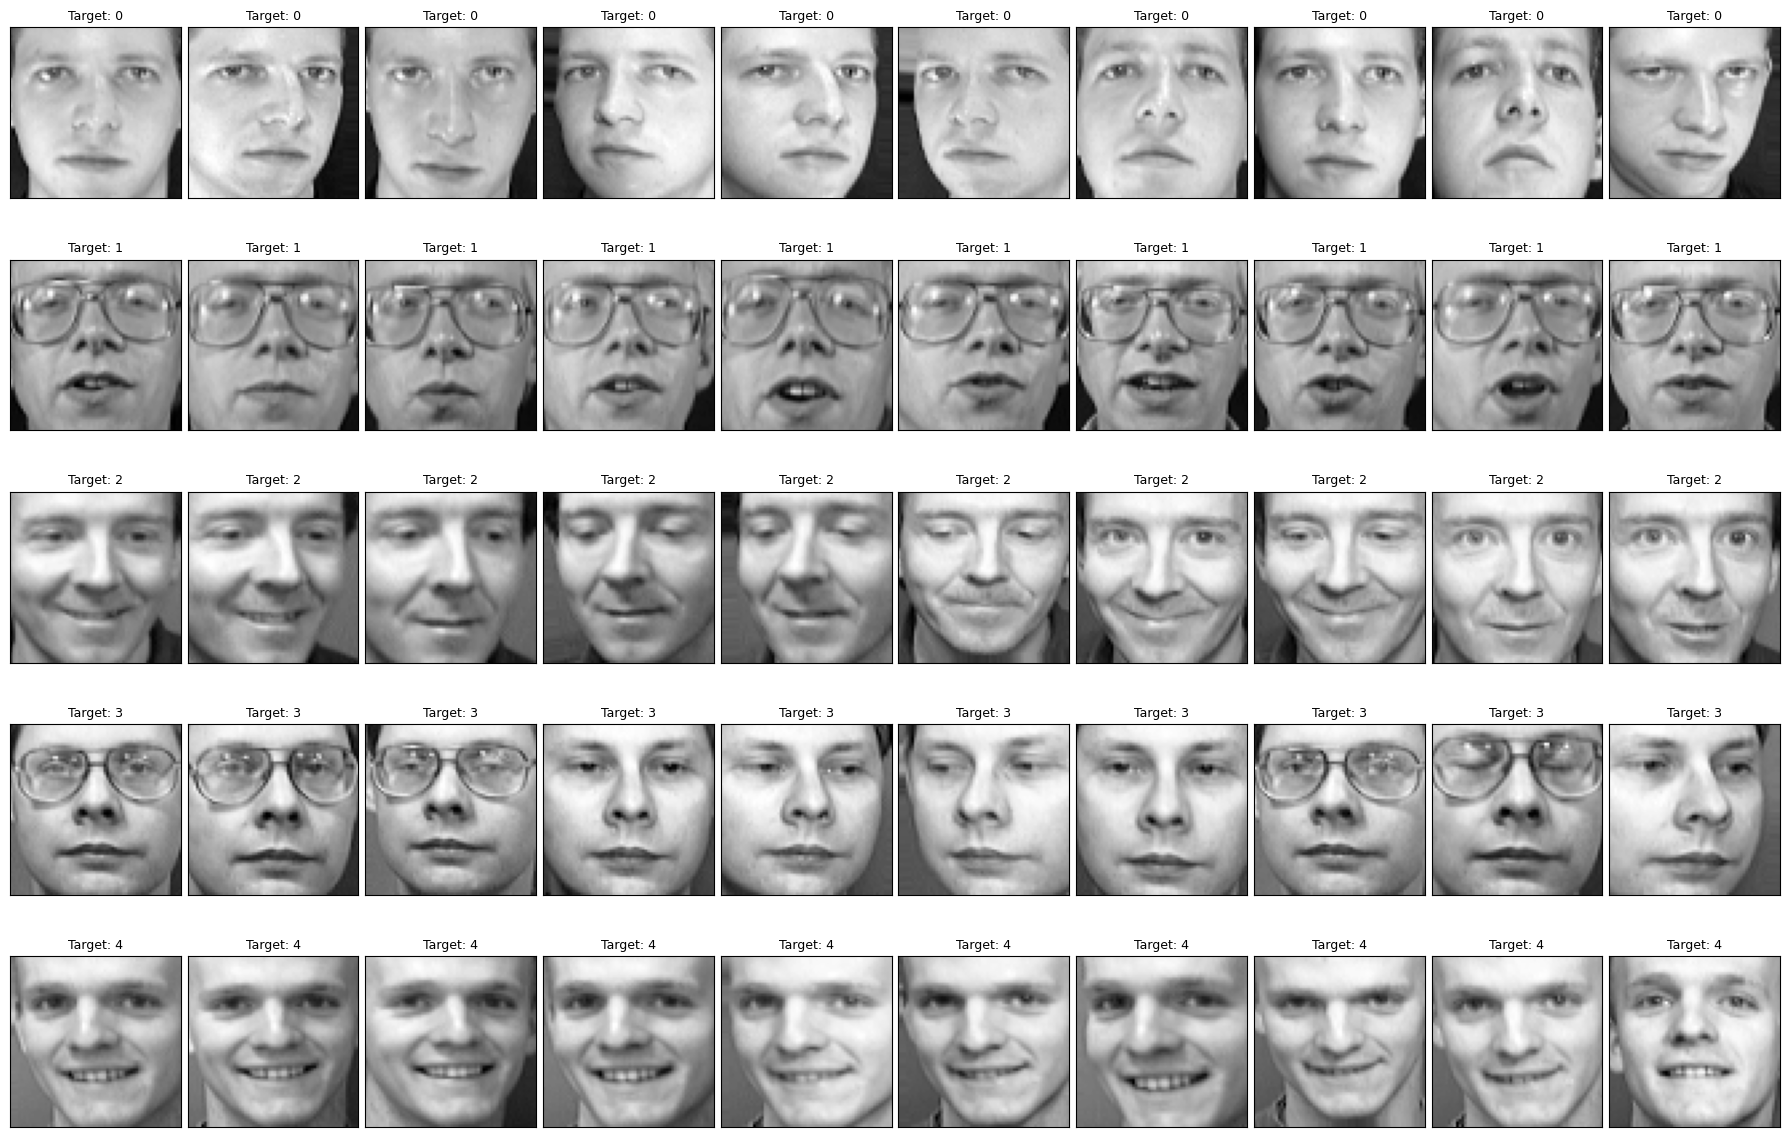

In [46]:
n_images = 50
images = data.images[:n_images]
targets = data.target[:n_images]

# Creating the grid (5 rows, 10 columns)
n_row = 5
n_col = 10

# Create the figure and subplots
plt.figure(figsize=(1.8 * n_col, 2.4 * n_row)) 

for i in range(n_images):
    # Subplot for each image
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f"Target: {targets[i]}", size=9)
    plt.xticks(())
    plt.yticks(())

plt.tight_layout(h_pad=1.0, w_pad=0.5)
plt.show()

In [49]:
print(data.DESCR[:500])
# 1D repesentation of the images (4OO images, 64*64=4096 features each)
image_data=data.data
print(f"Forme des données brutes (n_samples, n_features): {image_data.shape}")

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different
Forme des données brutes (n_samples, n_features): (400, 4096)


<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;"\>

The **Olivetti Faces** dataset is a classic benchmark dataset in **facial recognition** and computer vision. It was collected by AT\&T Laboratories Cambridge. It is about images of **human faces** (40 distinct individuals).

There are **400** images in total (10 images per person), each $64 \times 64$ pixel image is flattened into a 4096-dimensional feature vector (so we have 4096 features).

---
#### **Commentary on the Displayed Images**

We displayed the first 50 images, which represents the **10 variations for the first five individuals (Targets 0 through 4)**.

1.  **Intra-Class Variation (Challenges):** The most crucial observation is the significant change within the images of the **same person** (same label). These variations include changes in **head pose**, **facial expressions** (smiling, neutral), and **lighting conditions**. This variability is what makes the dataset challenging and representative of real-world facial recognition problems.
2.  **Resolution and Tone:** The images are **grayscale** and have a low resolution of $64 \times 64$ pixels. This simplicity is typical for older benchmark datasets and often requires dimensionality reduction techniques like Principal Component Analysis (PCA) for efficient processing.

</div>

**Q2**. Now apply PCA to the dataset, using scikit-learn (documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)).

Plot the cumulative explained variance. How many components do we need to explain 95% of the variance ?

To preserve 95% of the variance, we need 123 components.


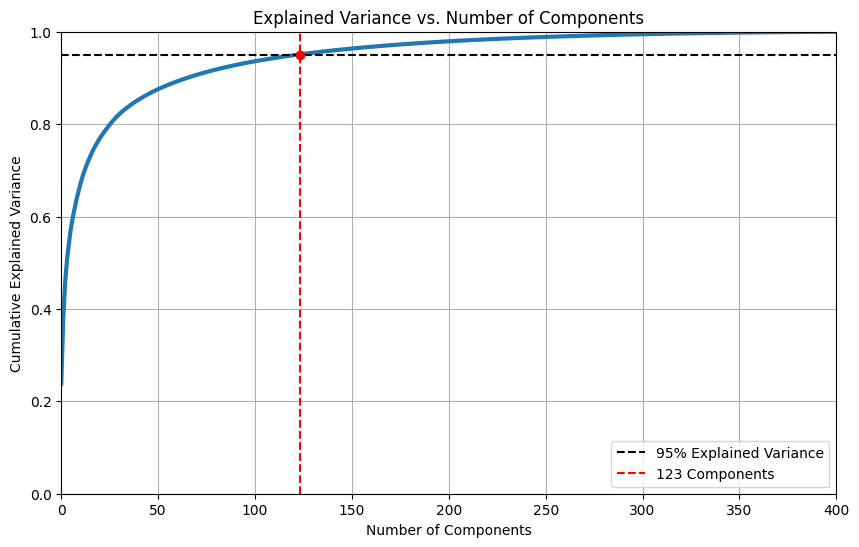

In [9]:
from sklearn.decomposition import PCA

# PCA computation
pca = PCA(n_components=None, random_state=42)
pca.fit(X)

# Cumulative Explained Variance
cumsum = np.cumsum(pca.explained_variance_ratio_)

# The number of components for 95% variance
d = np.argmax(cumsum >= 0.95) + 1 

print(f"To preserve 95% of the variance, we need {d} components.")

# Plots
plt.figure(figsize=(10, 6))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

plt.axhline(y=0.95, color='k', linestyle='--', label='95% Explained Variance')
plt.axvline(x=d, color='r', linestyle='--', label=f'{d} Components')
plt.plot(d, 0.95, "ro")

plt.grid(True)
plt.legend(loc="lower right")
plt.title("Explained Variance vs. Number of Components")
plt.show()

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">

### PCA Analysis: Cumulative Explained Variance

The plot above illustrates how much information (variance) is retained as we increase the number of principal components.

**Key Observations:**
* **The 95% Threshold:** The intersection of the red and black dashed lines indicates that we need exactly **123 components** to preserve 95% of the variance in the data.
* **Dimensionality Reduction:** By selecting these 123 components, we reduce the feature space from the original **4,096 pixels** down to **123 features**.
* **Compression Rate:** This represents a reduction of approximately **97%** in the size of the data, while losing only 5% of the information.
* **Curve Shape:** The steep rise at the beginning confirms that the first few "Eigenfaces" capture the majority of the facial structures (general shape, lighting), while the later components contribute marginally (fine details or noise).
</div>

**Q3.** Retrieve the principal components. These are the so-called *eigenfaces*. Display the first 40, and comment : what do the main components seem to capture ? What about later components ?

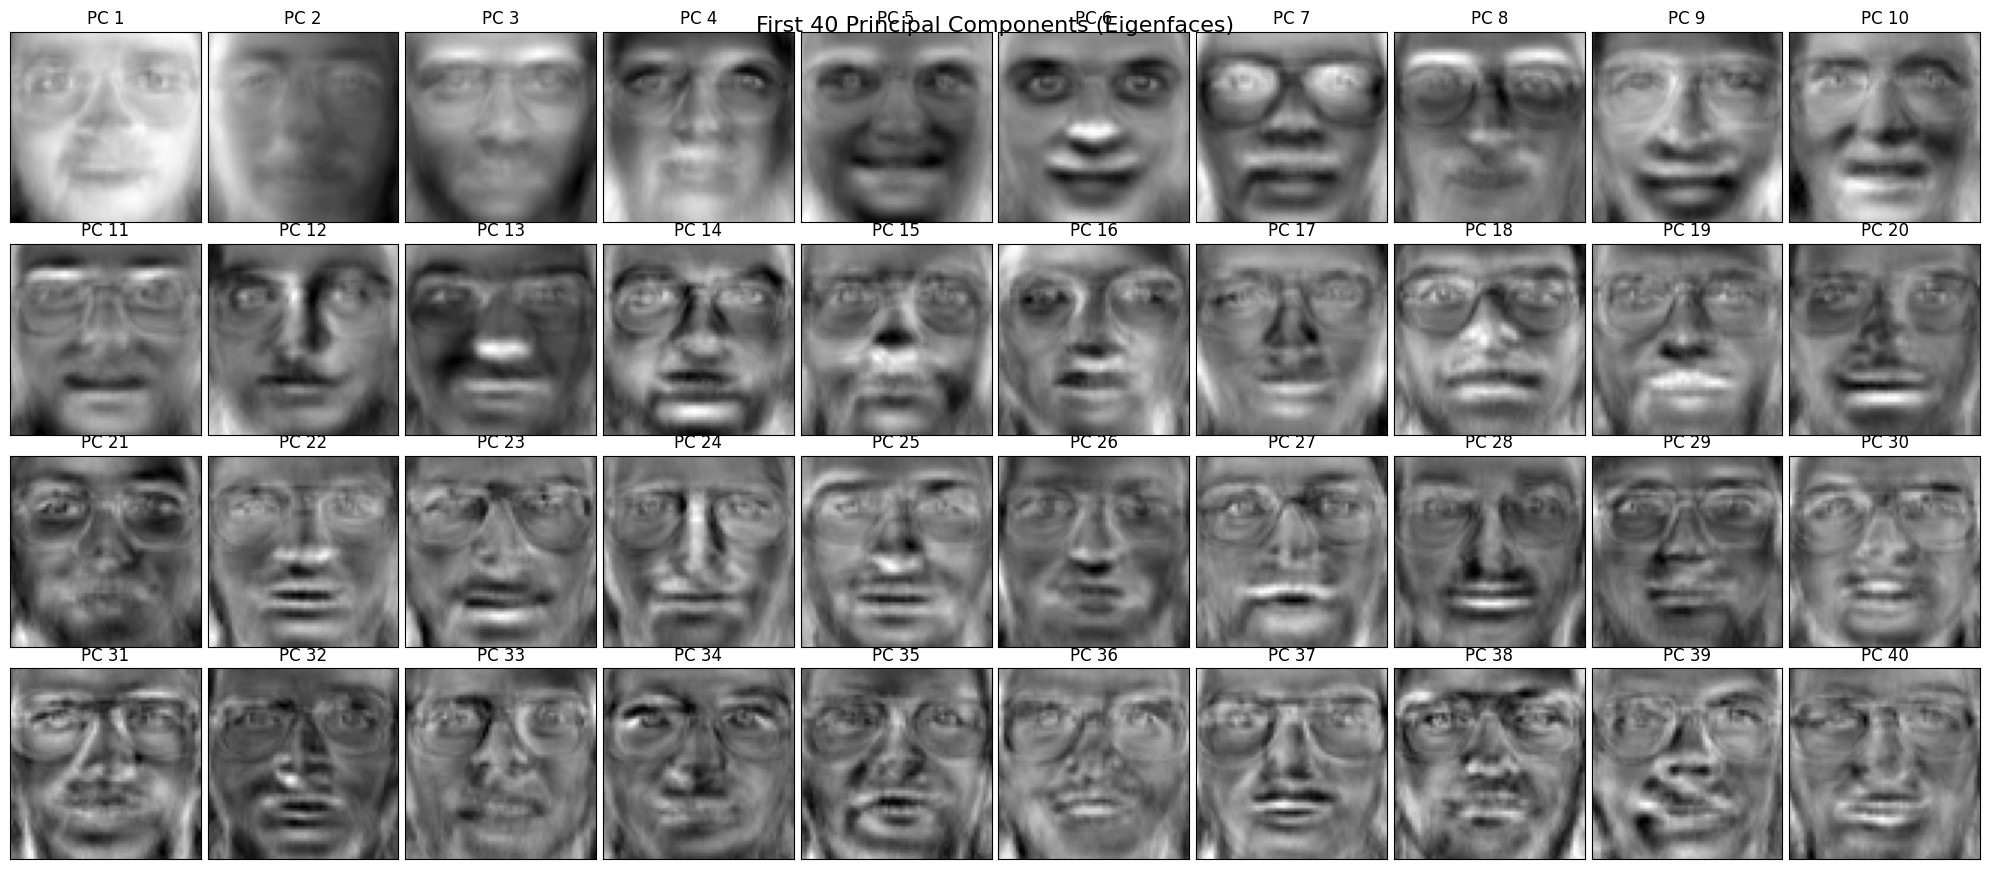

In [53]:
# Fit PCA (using a limited number of components for simplicity, 
# though the first 40 are retrieved regardless of the fit setting)
n_components = 40  
pca = PCA(n_components=n_components)
pca.fit(image_data)

# Retrieve the components (eigenfaces)
eigenfaces = pca.components_
# eigenfaces shape is (40, 4096)

# Define display parameters
n_row = 4
n_col = 10
n_eigenfaces_to_display = n_row * n_col

# Create the plot figure
plt.figure(figsize=(2. * n_col, 2.2 * n_row))

# Loop and display each eigenface
for i in range(n_eigenfaces_to_display):
    plt.subplot(n_row, n_col, i + 1)
    # Reshape the 1D vector (4096) back to 2D image (64x64)
    plt.imshow(eigenfaces[i].reshape((64, 64)), cmap='gray')
    plt.title(f"PC {i+1}", size=12)
    plt.xticks(())
    plt.yticks(())

plt.tight_layout(h_pad=0.5, w_pad=0.5)
plt.suptitle('First 40 Principal Components (Eigenfaces)', fontsize=16)
plt.show()

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">

### Commentary on the Principal Components

#### Main Components (First few PCs, e.g., PC 1 to PC 10)

The first few principal components capture the **largest variance** across the dataset, which typically corresponds to global structural features:

  * **Global Illumination and Background:** The first component show smooth transitions between light and dark areas, representing the major lighting variations (e.g., light coming from one side of the face).
  * **Coarse Structure:** They capture the general shape of the **face contour, nose, and mouth** in broad strokes. They look somewhat blurry and symmetrical.
  * **The Average Face:** The very first component is often close to the **average face** of the entire dataset, with variations indicating how much each original image deviates from this average.

These early eigenfaces are vital for dimensionality reduction because they encode the **maximum structural information** shared across all faces.

#### Later Components (e.g., PC 11 to PC 40)

As we move to later components (those that explain less individual variance), they start to capture **finer, localized details and noise**:

  * **Localized Features:** They focus on specific features like the **edges of the eyes, eyebrows, or mouth corners**.
  * **Specific Lighting Effects:** They might highlight very **localized shadows** or **blemishes** specific to certain images.
  * **Noise and High Frequencies:** Components further down the list tend to look more "noisy" or checkerboard-like, as they capture the **high-frequency details** and subtle texture that change rapidly from one image to the next.

In short: 

**Earlier components = Global structure and major lighting/pose variations.**

 **Later components = Fine details, subtle changes, and higher frequency noise.**
</div>

**Q4.** The *Olivetti* dataset contains a target variable, which correspond to the ID of the person in the photo (there are 40 distinct persons).

Compare the cross-validated performance (e.g., 5-fold) of logistic regression on the original dataset vs. on the representation induced by PCA using the first 50 components. Be careful to *stratify* the test set. Comment. You may also take the execution time in consideration in your reply.

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
Your answer here
</div>

**Q5**. To reconstruct a point back in its original representation, we can use the `.inverse_transform` method.

Since we are working with images, after reducing the dimensionality, we will obtain an imperfect reconstruction of the original image.

Set now the number of components of PCA to 300. Select an image from the dataset, and compare it to its reconstruction. You may assess the quality of the reconstruction with a metric of your choice.

In [ ]:
###########
## YOUR CODE HERE
###########

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
Your answer here
</div>

**Q6.** For the same image, display with subplots how the reconstruction evolves while keeping only 10, 20, 30... Up to 300 components.

What is the minimal number of components for which you consider the reconstruction to be acceptable ?

Conclude about the usefulness of this method.

In [ ]:
###########
## YOUR CODE HERE
###########

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
Your answer here
</div>